In [1]:
%matplotlib inline
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit_textbook.tools import array_to_latex

from numpy import pi

# Loading your IBM Q account(s)
provider = IBMQ.load_account()

print("Libraries imported successfully!")

Libraries imported successfully!


# Week 2 day 1 - Creating quantum circuits



# Coding cheat sheet:

### Defining a quantum circuit: 

`qc = QuantumCircuit(1)` Define a 1 qubit quantum circuit <br>

`qc.x(0)` Add an X gate <br>
`qc.h(0)` Add an H gate <br>
`qc.z(0)` Add a Z gate <br>
`qc.y(0)` Add a Y gate <br>

`qc.draw()` Draw the circuit <br>

### Set up the statevector simulator:<br>
`svsim = Aer.get_backend('statevector_simulator')` # Tell it which simulator you want to use <br>
`job = execute(qc,svsim)` # Put in the name of your quantum circuit where it says qc<br>
`result = job.result()` <br>
`state = result.get_statevector()` <br>

See the output on the Bloch sphere:<br>
`plot_bloch_multivector(state)`<br>

See the output in vector form:<br>
`array_to_latex(state, pretext="\\text{Statevector} = ")` <br>

See the output in histogram form: <br>
`svsim = Aer.get_backend('statevector_simulator')` # Same as before (tell it what simulator you want to use) <br>
`job = execute(qc,svsim,shots=100)` # Here you have to add shots - tell it how many times to run. <br>
`result = job.result()` <br>
`counts = result.get_counts(qc)` <br>
`plot_histogram(counts)` <br>

### Using a real quantum computer:

First check which one is the least busy: <br>
`from qiskit import IBMQ` <br>
`from qiskit.providers.ibmq import least_busy` <br>

#ask for the least busy quantum computer <br>
`provider = IBMQ.get_provider(hub='ibm-q')` <br>
`backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 2 and not x.configuration().simulator and x.status().operational==True))` <br>
#tell us what the least busy one is <br>
`print("least busy backend: ", backend)` <br>


Then run the job <br>
`job = execute(qc, backend=backend, shots=100)`
`result = job.result()` <br>
`counts = result.get_counts(qc)` <br>
`plot_histogram(counts)` 



## Creating quantum circuits


In [16]:
# BLOCK 1  - Create a single qubit quantum circuit. Draw the circuit

qc = QuantumCircuit(1)

/opt/conda/lib/python3.8/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


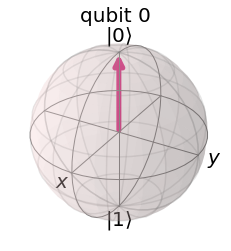

In [17]:
# BLOCK 2 - Run this block to simulate the circuit from Block 1 on statevector simulator and see the resulting state
# on the Bloch sphere

svsim = Aer.get_backend('statevector_simulator') # Same as before (tell it what simulator you want to use)
job = execute(qc,svsim)
result = job.result()
state = result.get_statevector(qc)
plot_bloch_multivector(state)
print()

In [19]:
# BLOCK 3 - Simulate the circuit from Block 1 on statevector simulator 
# and get the statevector for the output state

svsim = Aer.get_backend('statevector_simulator') # Tell it which simulator you want to use
job = execute(qc,svsim) # Put in the name of your quantum circuit where it says qc
result = job.result()
state = result.get_statevector()
array_to_latex(state, pretext="\\text{Statevector} = ")

<IPython.core.display.Math object>

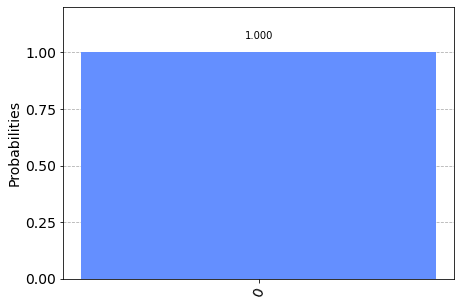

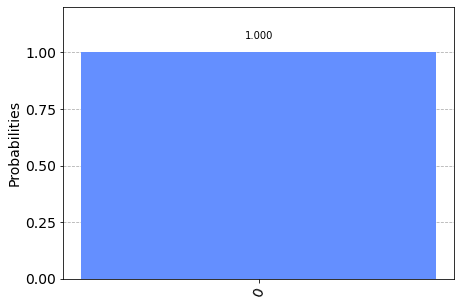

In [20]:
# BLOCK 4 - Simulate the circuit from Block 1 on statevector simulator to get the histogram
qc = QuantumCircuit(1)
#See the output in histogram form:
svsim = Aer.get_backend('statevector_simulator') # Same as before (tell it what simulator you want to use)
job = execute(qc,svsim,shots=100) # Here you have to add shots - tell it how many times to run.
result = job.result()
counts = result.get_counts(qc)
plot_histogram(counts)


<IPython.core.display.Math object>

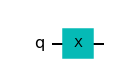

In [24]:
# BLOCK 5 - Create a quantum circuit that gives the output [0, 1]
# check to see if you are correct by using the statevector simulator to display the vector form of the output
qc = QuantumCircuit(1)
qc.x(0)
svsim = Aer.get_backend('statevector_simulator') # Tell it which simulator you want to use
job = execute(qc,svsim) # Put in the name of your quantum circuit where it says qc
result = job.result()
state = result.get_statevector()
array_to_latex(state, pretext="\\text{Statevector} = ")
qc.draw()
print()

In [27]:
# BLOCK 6 - Create a quantum circuit that gives the output 1/sqrt(2) * [1, 1]
# check to see if you are correct by using the statevector simulator to display the vector form of the output
qc = QuantumCircuit(1)
qc.h(0)
svsim = Aer.get_backend('statevector_simulator') # Tell it which simulator you want to use
job = execute(qc,svsim) # Put in the name of your quantum circuit where it says qc
result = job.result()
state = result.get_statevector()
array_to_latex(state, pretext="\\text{Statevector} = ")
print()

<IPython.core.display.Math object>

In [28]:
# BLOCK 7 - Create a quantum circuit that gives the output 1/sqrt(2) * [1, -1]
# check to see if you are correct by using the statevector simulator to display the vector form of the output
qc = QuantumCircuit(1)
qc.x(0)
qc.h(0)
svsim = Aer.get_backend('statevector_simulator') # Tell it which simulator you want to use
job = execute(qc,svsim) # Put in the name of your quantum circuit where it says qc
result = job.result()
state = result.get_statevector()
array_to_latex(state, pretext="\\text{Statevector} = ")
print()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

/opt/conda/lib/python3.8/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


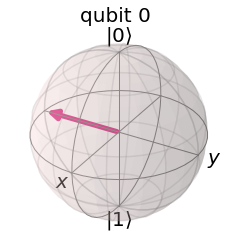

In [42]:
# BLOCK 8 - Create a quantum circuit and add the rx gate. Visualize the output on the Bloch Sphere
# try out different angles to get different results

qc = QuantumCircuit(1)
qc.rx(2*pi/4,0)
svsim = Aer.get_backend('statevector_simulator') # Tell it which simulator you want to use
job = execute(qc,svsim) # Put in the name of your quantum circuit where it says qc
result = job.result()
state = result.get_statevector()
array_to_latex(state, pretext="\\text{Statevector} = ")
plot_bloch_multivector(state)
print()

<IPython.core.display.Math object>

/opt/conda/lib/python3.8/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


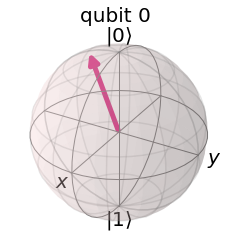

In [45]:
# BLOCK 9 - Plot the result from the above quantum circuit as a histogram.
# try out different angles and see how it changes the probabilities of measuring each state
qc = QuantumCircuit(1)
qc.rx(pi/8,0)
svsim = Aer.get_backend('statevector_simulator') # Tell it which simulator you want to use
job = execute(qc,svsim) # Put in the name of your quantum circuit where it says qc
result = job.result()
state = result.get_statevector()
array_to_latex(state, pretext="\\text{Statevector} = ")
plot_bloch_multivector(state)
print()


<IPython.core.display.Math object>

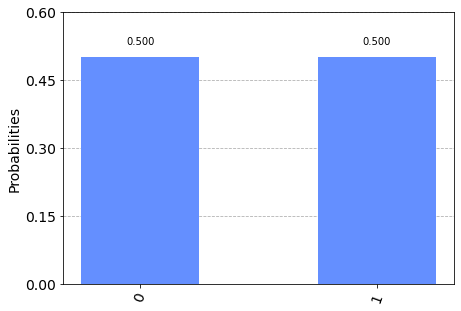

/opt/conda/lib/python3.8/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


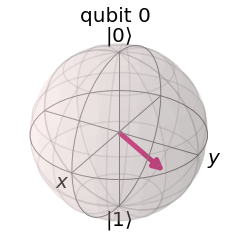

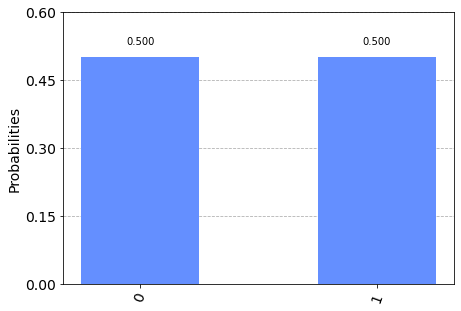

In [50]:
# BLOCK 10 - Create a quantum circuit that uses the H gate followed by the rz gate.
# how does the rz gate change the state? Does it change the probability of measuring |0> or |1>?

qc = QuantumCircuit(1)
qc.h(0)
qc.rz(pi/3,0)

svsim = Aer.get_backend('statevector_simulator') # Same as before (tell it what simulator you want to use)
job = execute(qc,svsim)
result = job.result()
state = result.get_statevector(qc)
array_to_latex(state, pretext="\\text{Statevector} = ")

svsim = Aer.get_backend('statevector_simulator') # Same as before (tell it what simulator you want to use)
job = execute(qc,svsim,shots=100) # Here you have to add shots - tell it how many times to run.
result = job.result()
state = result.get_statevector()
plot_bloch_multivector(state)
counts = result.get_counts(qc)
plot_histogram(counts)



## Using if statements and for loops with circuits

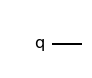

In [57]:
# BLOCK 11 - Create a variable called ‘ckt_check’ and set its value to be 1. 
#Using conditional (if) statements, create a circuit with 1 qubit if ckt_check=1 and draw the circuit.
#Else, print “Circuit check failed. No circuit was created.”

# Change the value of ckt_check to 0 and see if your code works!

ckt_check = 1
if ckt_check == 1:
    qc = QuantumCircuit(1)
    qc.draw()
else:
    print("Circuit check failed")

In [63]:
#BLOCK 12 - Create a list called ‘qc_values’ equal to [0, 1, 1, 0, 0]. 
#Using conditional (if) statements and for loops, create a quantum circuit for each element of qc_values which is 1, 
#and print “Circuit successfully created”. Else, print “Circuit check failed. No circuit was created.”

# Change the values of the list qc_values to see if your code still works!

qc_values = [0, 1, 1, 0, 0]
for i in qc_values:    
    if i == 1:
        qc = QuantumCirucit(1)
        qc.draw()
        print("Circuit Created")
    else: 
        print("Circuit check Failed")
            

Circuit check Failed
Traceback (most recent call last):
  File "<ipython-input-63-99805766fe4a>", line 10, in <module>
    qc = QuantumCirucit(1)
NameError: name 'QuantumCirucit' is not defined

Use %tb to get the full traceback.


In [ ]:
# Block 13 - After your TA has discussed what the code on the slide does, copy it here and run it

In [ ]:
# Block 14 - Create a 1-qubit quantum circuit called qc4 and add it to the list “my_circuits” from Block 7 using the append() function

Extra content

In [ ]:
# BLOCK 15 - Import the function getrandbits and test it out to see how it works

from random import getrandbits

getrandbits(1)

In [ ]:
# BLOCK 16 - Using the function getrandbits, create a list called bits_1
# the list should contain 10 random bits



In [ ]:
# BLOCK 17 - Using the function getrandbits, create a list called bits_2
# the list should contain 10 random bits



In [ ]:
# BLOCK 18 - 
# use a for loop to check the values of bits_1 and bits_2 
# and make a quantum circuit for each pair of bits (10 in total)
# Store the new quantum circuits in a list and add gates accordingly:
# if bits_1 is 0 and bits_2 is 0, the output of the circuit should be [1,0]
# if bits_1 is 0 and bits_2 is 1, the output should be [0,1]
# if bits_1 is 1 and bits_2 is 0, the output should be 1/sqrt(2)*[1,1]
# if bits_1 is 1 and bits_2 is 1, the otuput should be [0,-1]

